$H(Y|X)=H(X,Y)-H(X)$
* 条件熵定义
$H(Y|X)=$
决策树学习采用的是自顶向下的递归方法，其基本思想是以信息熵为度量构造一棵熵值下降最快的树，到叶子节点处的熵值为0，此时每个叶节点中的实例都属于同一类
决策树学习算法的最大优点是，在学习过程中，不需要使用者了解过多的背景知识，只需要对训练例子进行较好的标注，就能够进行学习。
从一类无序、无规则的食物中推理出决策树表示的分类规则
信息增益表示得知特征A的信息而使得类X的信息不确定性减少的程度


## 三种决策树学习算法
适应信息增益来进行特征选择的决策树学习过程，即为ID3策略
C4.5信息增益率
CART基尼系数
一个属性的信息增益越大，表明属性对样本的熵减少能力更强，这个属性使得数据由不确定性变成确定性的能力越强
## 提升方法
一个概念如果存在一个多项式的学习算法那能够学习它，并且正确率很高，那么，这个概念是强可学习的
一个概念如果存在一个多项式的学习算法能够学习它，丙炔学习的正确率仅比随机猜测策略好，这个概念是弱可学习的
强可学习与弱科学系是等价的
在学习中，如果发现了“弱学习算法”，可以将其提升为“强可学习法”


## Adaboost
### Introduction
“Adaptive Boosting”缩写，前一个基本分类器分错的样本会得到加强，加权后的全体样本再次被用来训练下一个基分类器。同时，在每一轮中加入一个新的若分类器，指导达到某个预定的足够小的错误率或达到预先指定的最大迭代次数。
设训练数据集$T={(x_1,y_1),(x_2,y_2)...(x_n,y_n)}$
初始化训练数据的权值分布
$D_1=(w_{11},w_{12}....w_{1n})$
步骤2:
进行多轮迭代，用m=1,2....M表示迭代的多少轮
使用具有权值分布的Dm的训练数据集学习，得到基本分类器(选取让误差率最低的阈值来设计基本的分类器)
G()
计算G_m(x)在训练数据集上的分类误差率
$e_m=P(Gm)$

$\alpha_m=\frac{1}{2}ln\frac{1-e_m}{e_m}$

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

In [39]:
X1,y1=make_gaussian_quantiles(cov=2,n_samples=200,n_features=2,n_classes=2,random_state=1)
X2,y2=make_gaussian_quantiles(mean=(3,3),cov=1.5,n_samples=300,n_features=2,n_classes=2,random_state=1)
X=np.concatenate((X1,X2))
y=np.concatenate((y1,y2))
print(X.shape,y.shape)
print(y1)
print(-y2+1)


(500, 2) (500,)
[0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0
 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0
 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1
 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0]
[0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0
 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0
 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0
 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0
 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1
 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0

<function print>

In [33]:
bdt=AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),algorithm='SAMME',n_estimators=200)
bdt.fit(X,y)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

Text(0.5,1,'Decision Boundary')

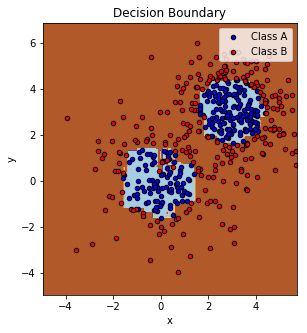

In [34]:
plot_colors='br'
plot_step=0.02
class_names='AB'
plt.figure(figsize=(10,5))
plt.subplot(121)
x_min,x_max=X[:,0].min()-1,X[:,0].max()-1
y_min,y_max=X[:,1].min()-1,X[:,1].max()-1
xx,yy=np.meshgrid(np.arange(x_min,x_max,plot_step),np.arange(y_min,y_max,plot_step))
Z=bdt.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
cs=plt.contourf(xx,yy,Z,cmap=plt.cm.Paired)
plt.axis('tight')
for i,n,c in zip(range(2),class_names,plot_colors):
    idx=np.where(y==i)
    plt.scatter(X[idx,0],X[idx,1],c=c,cmap=plt.cm.Paired,s=20,edgecolor='k',label="Class %s"%n)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

In [43]:
help(AdaBoostClassifier.predict)

Help on function predict in module sklearn.ensemble.weight_boosting:

predict(self, X)
    Predict classes for X.
    
    The predicted class of an input sample is computed as the weighted mean
    prediction of the classifiers in the ensemble.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape = [n_samples, n_features]
        The training input samples. Sparse matrix can be CSC, CSR, COO,
        DOK, or LIL. DOK and LIL are converted to CSR.
    
    Returns
    -------
    y : array of shape = [n_samples]
        The predicted classes.

